In [4]:
import requests
import random
from IPython.display import Markdown, display, HTML
from PIL import Image
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')

**Generating a movie description...**

1. Lifelong friends and national idols Ricky Bobby and Cal Naughton Jr. have earned their NASCAR stripes with their uncanny knack of finishing races in the first and second slots, respectively, and slinging catchphrases like "Shake and bake!" But when a rival French driver coasts onto the track to challenge their records, they'll have to floor it to retain their top-dog status.

Does this movie sound interesting to you? Please type yes or no: yes


**Retrieving movie details...**

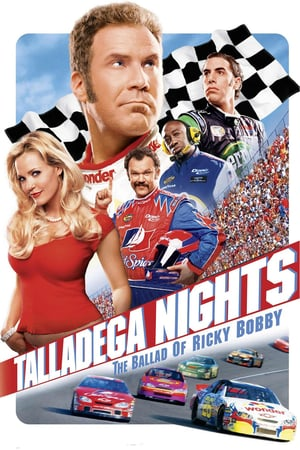

**Title:** Talladega Nights: The Ballad of Ricky Bobby

**Genres:** Comedy

**Release Date (year-month-date):** 2006-08-04

**Cast Members:** Will Ferrell, John C. Reilly, Sacha Baron Cohen, Gary Cole, Michael Clarke Duncan, Leslie Bibb, Amy Adams, Jane Lynch, Andy Richter, Molly Shannon, David Koechner, Adam McKay, Austin Crim, Jake Johnson, Lorrie Bess Crumley, Jack McBrayer, Ian Roberts, Jason Davis, John D. King, Luke Bigham, Pat Hingle, Yasiin Bey, Elvis Costello, Ed Lauter, Greg Germann, Dale Earnhardt Jr., Dick Berggren, Houston Tumlin, Grayson Russell, Ted Manson, Mike Joy, Darrell Waltrip, Rob Riggle, Jack Blessing

**Number of votes:** 793

**Average Rating (Based on user votes, out of 10):** 6.3

**Description:** Lifelong friends and national idols Ricky Bobby and Cal Naughton Jr. have earned their NASCAR stripes with their uncanny knack of finishing races in the first and second slots, respectively, and slinging catchphrases like "Shake and bake!" But when a rival French driver coasts onto the track to challenge their records, they'll have to floor it to retain their top-dog status.

Would you like to watch the trailer of Talladega Nights: The Ballad of Ricky Bobby? Please type yes or no: yes


Would you like to generate more movies? Please type yes or no: yes


**Generating a movie description...**

2. Robert McCall, who serves an unflinching justice for the exploited and oppressed, embarks on a relentless, globe-trotting quest for vengeance when a long-time girl friend is murdered.

Does this movie sound interesting to you? Please type yes or no: no


**Generating a movie description...**

3. An unemployed cartoonist moves back in with his parents and younger brother Freddy. When his parents demand he leave, he begins to spread rumors that his father is sexually abusing Freddy.

Does this movie sound interesting to you? Please type yes or no: yes


**Retrieving movie details...**

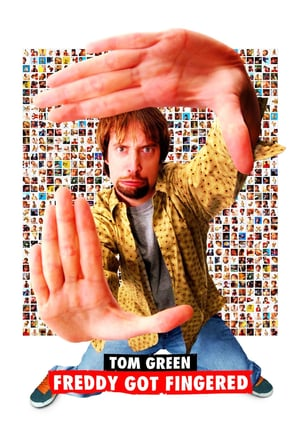

**Title:** Freddy Got Fingered

**Genres:** Comedy

**Release Date (year-month-date):** 2001-04-18

**Cast Members:** Tom Green, Rip Torn, Marisa Coughlan, Eddie Kaye Thomas, Harland Williams, Anthony Michael Hall, Julie Hagerty, Jackson Davies, Connor Widdows, John R. Taylor, Bob Osborne, Fiona Hogan, George Gordon, Ron Selmour, Drew Barrymore, David Neale, Scott Heindl, Wendy Chmelauskas, R. Nelson Brown, Lorena Gale, Simon Longmore, Giacomo Baessato, Eric Keenleyside, Shaquille O'Neal, Rick Tae, Noel Fisher, Irene Karas, Ted Friend, Balinder Johal, Kamaljeet Kler, Ralph Wagner, Mike Bullard, Ralph Alderman, Chris Carver, Michele Cummins, Joe Flaherty, Stephen E. Miller, John Rigg, Jorge Rodriguez, Cliff Solomon, Stephen Tobolowsky, Henry O. Watson, Tom Hallick, Darren Moore, Allan Gray

**Number of votes:** 192

**Average Rating (Based on user votes, out of 10):** 4.5

**Description:** An unemployed cartoonist moves back in with his parents and younger brother Freddy. When his parents demand he leave, he begins to spread rumors that his father is sexually abusing Freddy.

Would you like to watch the trailer of Freddy Got Fingered? Please type yes or no: no
Would you like to generate more movies? Please type yes or no: no
Would you like to get similar movie titles to: Freddy Got Fingered? Please type yes or no: yes


**Getting similar movie titles...**

BASEketball 
Slackers 
Stealing Harvard 
Bio-Dome 
Dirty Work 
Orgazmo 
Airheads 
Undercover Brother 
Black Sheep 
Half Baked 
Say It Isn't So 
Joe Dirt 
Beerfest 
Death to Smoochy 
Orange County 
Kingpin 
Beavis and Butt-Head Do America 
A Night at the Roxbury 
Pootie Tang 
Canadian Bacon


**Hope you enjoy watching the movie(s)!**

In [5]:
page_number = 0
overview_length = 0
movies = 0
count = 1

def printbold(string):
    display(Markdown(string))
    
def moviegenerator():
    amount_of_movies = []
    while(len(amount_of_movies)-1<0):
        global page_number
        page_number = str(random.randint(0,300))
        api_key = 'ed49669e2301eefe165a22a0551c3496'
        response = requests.get('https://api.themoviedb.org/3/movie/popular?api_key=' +  api_key + '&language=en-US&page=' + page_number)
        global movies
        movies = response.json()
        try:
            for i in range(0,len(movies['results'])):
                amount_of_movies.append(movies['results'][i].get('title'))
        except KeyError: 'results'
    if(len(amount_of_movies)!=0):
        global overview_length
        overview_length = random.randint(0,len(amount_of_movies)-1)

def getOverview():
    return str(movies['results'][overview_length].get('overview'))

def getTitle():
    return movies['results'][overview_length].get('title')

def getReleasedate():
    return movies['results'][overview_length].get('release_date')

def getAverageRating():
    return str(movies['results'][overview_length].get('vote_average'))

def getVoteCount():
    return str(movies['results'][overview_length].get('vote_count'))

def getGenre():
    genres = []
    all_genres = []
    genre_names = []
    api_key = 'ed49669e2301eefe165a22a0551c3496'
    our_movie_genre_ids =  movies['results'][overview_length].get('genre_ids')
    genre_response = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=' +  api_key + '&language=en-US')
    genre = genre_response.json()
    for i in range(0,len(genre['genres'])):
        all_genres.append(genre['genres'][i].get('id'))
        genre_names.append(genre['genres'][i].get('name'))

    for i in range(0,len(our_movie_genre_ids)):
        for j in range(0,len(all_genres)):
            if our_movie_genre_ids[i] == all_genres[j]:
                genres.append(genre_names[j])
    return (', '.join(genres))

def getPosterpath():
    return movies['results'][overview_length].get('poster_path')

def getMoviePoster():
    poster_url = ('https://image.tmdb.org/t/p/w300/' + getPosterpath())
    response = requests.get(poster_url)
    img = Image.open(BytesIO(response.content))
    return img

def getId():
    return movies['results'][overview_length].get('id')

def getCast():
    all_cast = []
    api_key = 'ed49669e2301eefe165a22a0551c3496'
    cast_url = ('https://api.themoviedb.org/3/movie/'+ str(getId()) + '/credits?api_key=' + api_key)
    response = requests.get(cast_url)
    cast_members = response.json()
    for i in range(0,len(cast_members['cast'])):
        all_cast.append(cast_members['cast'][i].get('name'))
    return (', '.join(all_cast))

def getSimilarMovies():
    similar_movies = []
    api_key = 'ed49669e2301eefe165a22a0551c3496'
    response = requests.get('https://api.themoviedb.org/3/movie/' + str(getId()) + '/recommendations?api_key=' + api_key + '&language=en-US&page=1')
    recommended_movies = response.json()
    for i in range(0,len(recommended_movies['results'])):
        if recommended_movies['results'] == '':
            print("No similar movies found for " + getTitle())
        else:
            similar_movies.append(recommended_movies['results'][i].get('title'))
    return similar_movies

def wantSimilarMovies():
    similar_movies_input = input("Would you like to get similar movie titles to: " + getTitle() + '? Please type yes or no: ').lower()
    while True:
        if similar_movies_input == 'yes':
            printbold("**Getting similar movie titles...**")
            print(*getSimilarMovies(), sep=' ''\n')
            printbold("**Hope you enjoy watching the movie(s)!**")
            break
        elif similar_movies_input == 'no':
            print("Hope you enjoy watching " + getTitle() + '!')
            break
        else:
            print('Invalid input. Please type yes or no: ')
            similar_movies_input = input("Would you like to get similar movie titles to: " + getTitle() + '? Please type yes or no: ').lower()

def getVideoKey():
    video_key = []
    first_key = None
    api_key = 'ed49669e2301eefe165a22a0551c3496'
    videodetails_url = ('https://api.themoviedb.org/3/movie/' + str(getId()) + '/videos?api_key=' + api_key + '&language=en-US')
    video_response = requests.get(videodetails_url)
    response_data = video_response.json()
    for i in range(0,len(response_data['results'])):
        video_key.append(response_data['results'][i].get('key'))
    for key in range(0,len(video_key)):
        first_key = video_key[0]
    return first_key
    
def getTrailer():
    try:
        youtubevideo =  HTML("<iframe width=560 height=315 src=https://www.youtube.com/embed/" + getVideoKey() + ' frameborder="0" allowfullscreen></iframe>')
    except TypeError:
        return '-1'
    return youtubevideo
            
def getMoreMovies():
    more_movies_input = input("Would you like to generate more movies? Please type yes or no: ").lower()
    while True:
        if more_movies_input == 'yes':
            global count
            count = count + 1
            getEverything()
            break
        elif more_movies_input == 'no':
            wantSimilarMovies()
            break
        else:
            print("Invalid input. Please type yes or no: ")
            more_movies_input = input("Would you like to generate more movies? Please type yes or no: ").lower()    

def getEverything():
    stop = True
    global count
    while stop:
        getMovie()
        user_input = input("Does this movie sound interesting to you? Please type yes or no: ").lower()
        while True:
            if user_input == 'yes':
                getMovieDetails()
                trailer_input = input("Would you like to watch the trailer of %s? Please type yes or no: " % getTitle()).lower()
                while True:
                    if trailer_input == 'yes':
                        if getTrailer() == '-1':
                            printbold('**Sorry, no videos were found for this movie.**')
                            getMoreMovies()
                            break
                        else:
                            display(getTrailer())
                            getMoreMovies()
                            break
                    elif trailer_input == 'no':
                        getMoreMovies()
                        break
                    else:
                        print("Invalid input. Please type yes or no: ")
                        trailer_input = input("Would you like to watch the trailer of %s? Please type yes or no: " % getTitle()).lower()
                stop = False
                break
            elif user_input == 'no':
                count = count + 1
                break
            else:
                print("Invalid input. Please type yes or no: ")
                user_input = input("Does this movie sound interesting to you? Please type yes or no: ").lower()
            
def getMovieDetails():
    printbold('**Retrieving movie details...**')
    display(getMoviePoster())
    printbold("**Title:**" + ' ' + getTitle())
    printbold("**Genres:**" + ' ' + getGenre())
    printbold("**Release Date (year-month-date):**" + ' ' + getReleasedate())
    printbold("**Cast Members:**" + ' ' + getCast())
    printbold("**Number of votes:**" + ' ' + getVoteCount())
    printbold("**Average Rating (Based on user votes, out of 10):**" + ' ' + getAverageRating())
    printbold("**Description:**" + ' ' + getOverview())

def getMovie():
    moviegenerator()
    while getOverview() == '':
        moviegenerator()
    printbold('**Generating a movie description...**')
    print(str(count) + '.', getOverview() + '\n')
            
#main function
stop = True
while stop:
    getMovie()
    user_input = input("Does this movie sound interesting to you? Please type yes or no: ").lower()
    while True:
        if user_input == 'yes':
            getMovieDetails()
            trailer_input = input("Would you like to watch the trailer of %s? Please type yes or no: " % getTitle()).lower()
            while True:
                if trailer_input == 'yes':
                    if getTrailer() == '-1':
                        printbold('**Sorry, no videos were found for this movie.**')
                        getMoreMovies()
                        break
                    else:
                        display(getTrailer())
                        getMoreMovies()
                        break
                elif trailer_input == 'no':
                    getMoreMovies()
                    break
                else:
                    print("Invalid input. Please type yes or no: ")
                    trailer_input = input("Would you like to watch the trailer of %s? Please type yes or no: " % getTitle()).lower()
            stop = False
            break
        elif user_input == 'no':
            count = count + 1
            break
        else:
            print("Invalid input. Please type yes or no: ")
            user_input = input("Does this movie sound interesting to you? Please type yes or no: ").lower()